<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Time Series Theory in Python - Part 1: Exploratory Time Series Analysis

This notebook focuses on introducing basic concepts of time series analysis for univariate time series and then extending to some specific analysis for multivariate time series. 

In [3]:
pip install PythonTsa statsmodels openpyxl seaborn scikit-learn

  Using cached PythonTsa-1.4.8-py3-none-any.whl.metadata (740 bytes)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached PythonTsa-1.4.8-py3-none-any.whl (440 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from PythonTsa.datadir import getdtapath # We use the Python package PythonTsa to load datasets coming with this package.
dtapath=getdtapath()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Stationarity

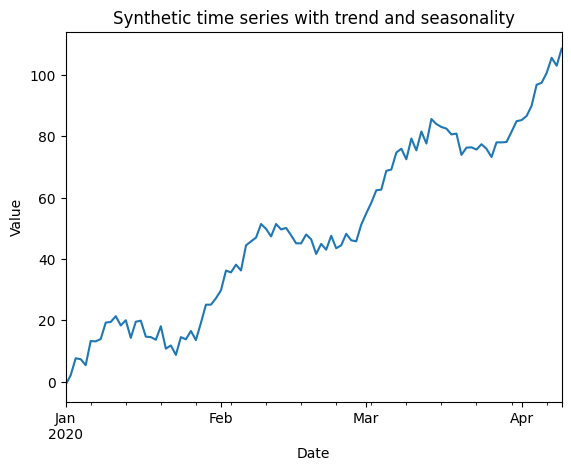

In [7]:
# Generate synthetic time series data
time = pd.date_range(start="2020-01-01", periods=100)
trend = np.arange(100)  # Linear trend as a NumPy array
seasonal = [10 * np.sin(i / 5) for i in range(100)]  # Seasonal component
noise = np.random.normal(loc=0, scale=2, size=100)  # Random noise (loc = mean; scale = SD)

# Combine trend, seasonal, and noise components into one array
data = trend + seasonal + noise

# Create DataFrame
series = pd.Series(data, index=time)

# Plot the time series
series.plot()
plt.title("Synthetic time series with trend and seasonality")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

[ 9.15229707e-02  2.37594744e+00  1.34814243e+00 -4.20966781e+00
  1.17312402e-01 -1.30588333e+00  9.67105009e-01 -1.97075141e+00
 -2.55254514e-01  5.09061163e-01  6.22818615e-01  1.19815225e+00
  8.60159179e-01 -3.87936056e+00  5.54607630e-02 -2.62497893e+00
  5.21570392e-02  3.24235831e+00  1.50567120e+00 -5.73813157e+00
  5.12372049e-01 -2.06228740e+00 -2.26400525e+00  1.82570019e+00
 -2.57036194e-01 -9.69268983e-02  3.37235245e+00 -4.04896117e+00
  1.92135596e+00 -1.25752081e-01 -2.70125543e+00 -1.46980413e+00
 -2.09861999e+00 -1.06880375e+00  1.01266169e+00  6.82935667e-01
  2.77732415e+00 -1.35647907e+00 -1.71186698e-01 -4.19042712e-01
 -5.92726839e-01  1.30634913e+00  2.90179680e-01  2.11451728e+00
  1.07292523e+00 -2.72684787e+00 -3.30947182e-04  3.68915723e+00
  1.81709428e+00  1.23577415e+00  2.77217474e+00  3.05656188e+00
 -3.64573024e+00  7.91152859e-01 -1.10620809e+00 -2.75280575e+00
 -5.21085338e-01  3.57803579e-01 -1.43865392e+00 -6.71794741e-02
  1.36692234e+00 -4.66115

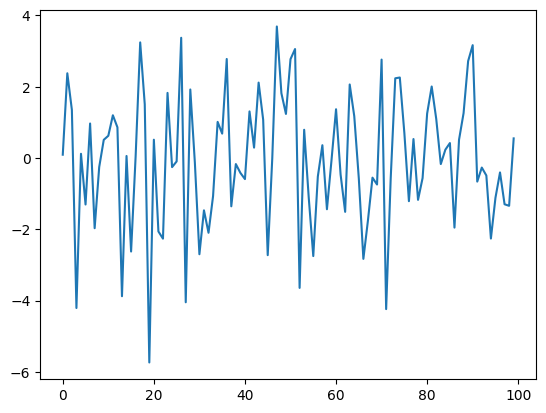

In [8]:
plt.plot(np.arange(100), noise)
print(noise)

## 2. Autocorrelation

In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

### Autocorrelation Function (ACF):

The ACF Plot enables the evaluation of the correlation between an observation and its previous values.

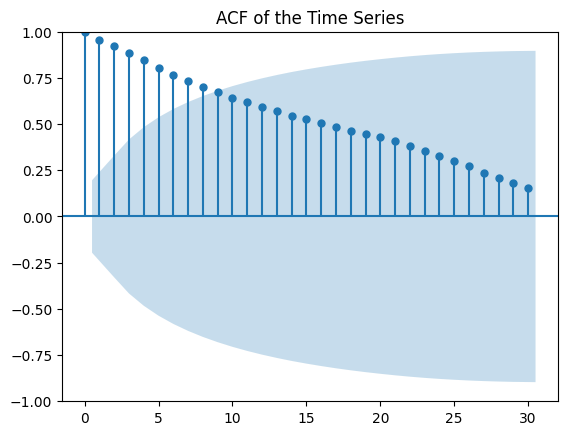

In [9]:
plot_acf(series, lags=30, alpha=0.05) # alpha=0.05 is the default)
plt.title("ACF of the Time Series")
plt.show()

##### shows a non-stationary time-series because some of the ACF fall out of the confidence interval (the blue shaded area)

### Partial Autocorrelation Function (PACF):

The PACF Plot helps to understand the direct relationship between an observation and its own lagged values, excluding the effects of other lags. The PACF clearly measures the correlation between $X_t$ and $X_{t-k}$ that is not explained by $\{ X_{t-k+1}, \dots, X_{t-1} \}$.

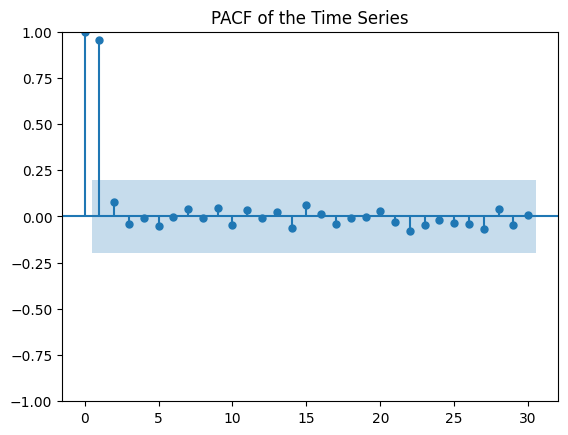

In [10]:
plot_pacf(series, lags=30)
plt.title("PACF of the Time Series")
plt.show()

### Lag Plot:

The Lag Plot offers a scatter plot that directly compares the values of the time series to its lagged versions, helping to identify any linear relationships.

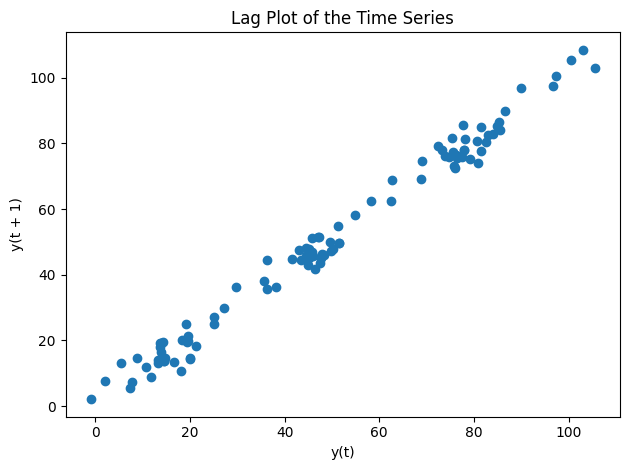

In [11]:
lag_plot(series)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

### **Example 1: Chinese Quarterly GDP**

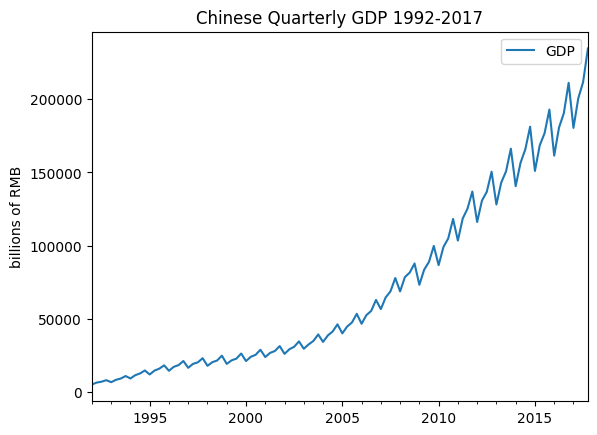

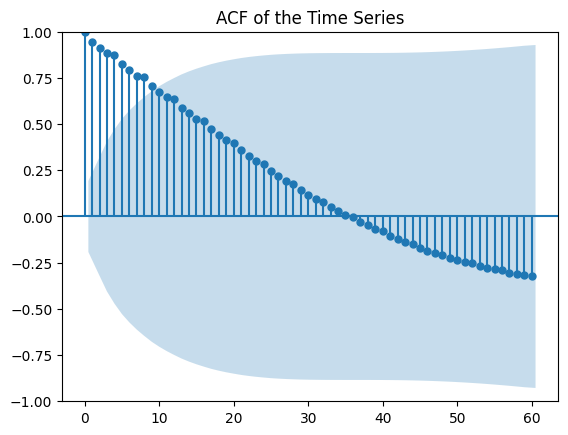

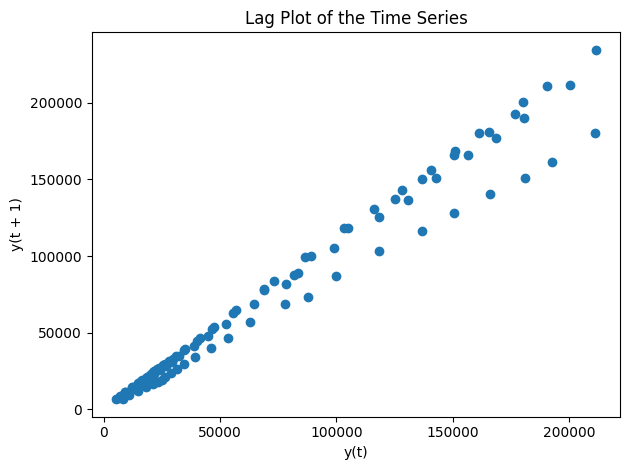

In [12]:
# Load the data
x = pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv',header=0)
dates = pd.date_range(start='1992',periods=len(x),freq='QE')
x.index=dates

# Plot the time series
x.plot()
plt.title('Chinese Quarterly GDP 1992-2017')
plt.ylabel('billions of RMB')
plt.show()

# Plot ACF
plot_acf(x, lags=60)
plt.title("ACF of the Time Series")
plt.show()

# Plot Lag Plot
lag_plot(x)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

#### It's not a stationary time-series because it exhibits seasonality and a trend

### **Example 2: Quarterly Exchange Rates of GBP to NZ Dollar**

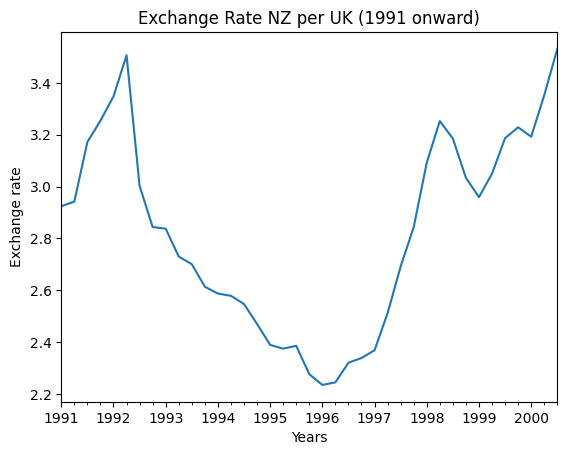

<Figure size 640x480 with 0 Axes>

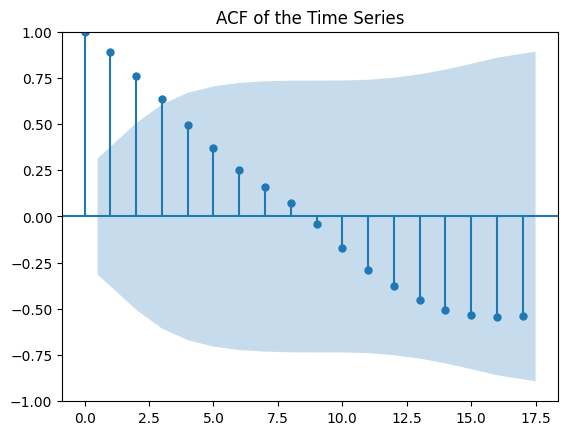

<Figure size 640x480 with 0 Axes>

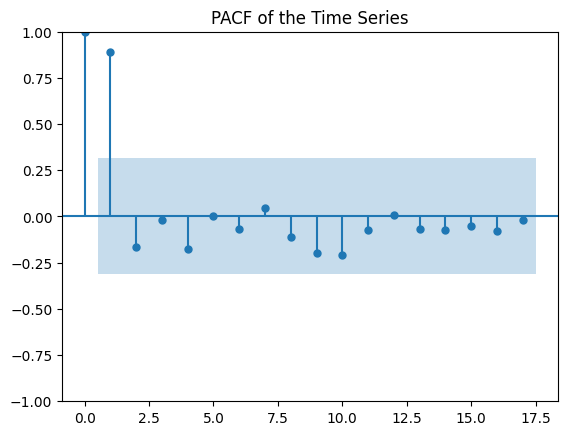

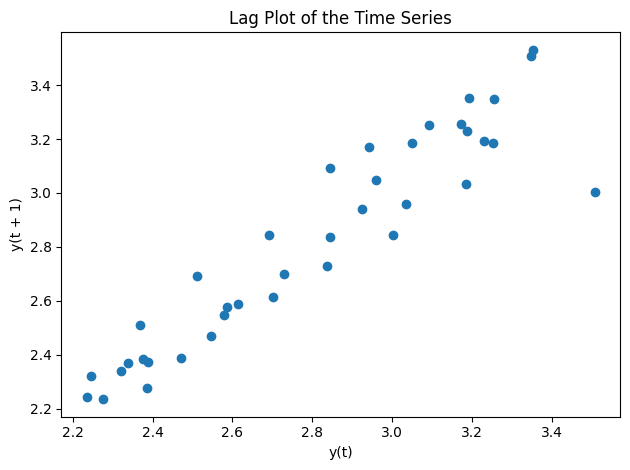

In [13]:
# Load the exchange rate data
x = pd.read_csv(dtapath + 'ExchRate NZ per UK.txt', header=0)

# Create a date range starting from 1991 with quarterly frequency
dates = pd.date_range('1991', periods=len(x), freq='QE')

# Set the index to the created date range
x.index = dates

# Create a time series from the 'xrate' column
xts = pd.Series(x['xrate'])

# Plot the time series
xts.plot()
plt.xlabel('Years')
plt.ylabel('Exchange rate')
plt.title('Exchange Rate NZ per UK (1991 onward)')
plt.show()

# Plot ACF
fig = plt.figure()
plot_acf(xts, lags=17)
plt.title("ACF of the Time Series")
plt.show()

# Plot PACF
fig = plt.figure()
plot_pacf(xts, lags=17)
plt.title("PACF of the Time Series")
plt.show()

# Plot Lag Plot
lag_plot(xts)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

## 3. Random walks

Three simulated paths (time plots) of the standard normal random walk:

In [14]:
from numpy.random import normal

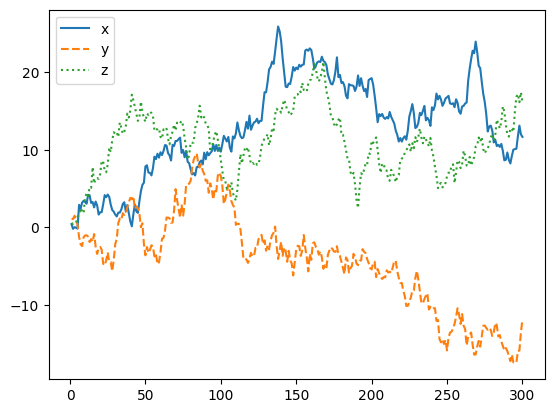

In [15]:
np.random.seed(1357)
a=normal(size=300); b=normal(size=300); c=normal(size=300)
x=np.cumsum(a); y=np.cumsum(b); z=np.cumsum(c)
xyz=pd.DataFrame({'x': x, 'y': y, 'z': z})
xyz.index=range(1,301)
xyz.plot(style=['-', '--', ':']); plt.show() # style means matplotlib line style per column

## 4. White noise

## 4.1 Simulating a Gaussian white noise

In [16]:
from numpy import random

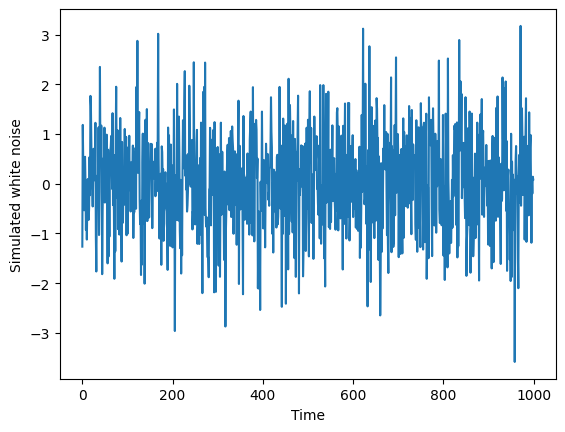

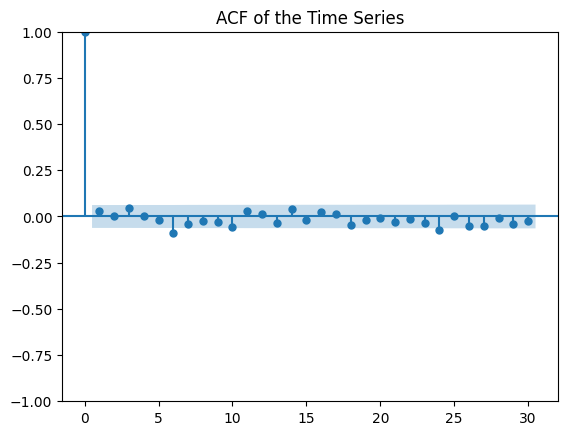

In [17]:
random.seed(135) # for repeat
x=random.normal(loc=0, scale=1, size=1000)
xts=pd.Series(x)
xts.plot(); plt.xlabel('Time')
plt.ylabel('Simulated white noise')
plt.show()

plot_acf(xts, lags=30) # plotting ACF
plt.title("ACF of the Time Series")
plt.show()

It is an intuitive method for testing that a stationary time series is a white noise or not: To examine its ACF plot and if the ACF plot is similar to this figure, then we are apt to think that the time series is a white noise.

## 4.2 Chaos like a white noise

In [18]:
# Initialize an empty pandas Series with a float data type
x = pd.Series(dtype=float)

# Start value for y
y = 0.3

# Use a for loop to generate the values
for t in range(1, 501):
    y = 4.0 * y * (1 - y)  # Logistic map equation
    x.loc[t-1] = y  # Assigning the value at index t-1

# Set the index of the series to be in the range 1 to 500
x.index = range(1, 501)

# Display the result
print(x)

1      0.840000
2      0.537600
3      0.994345
4      0.022492
5      0.087945
         ...   
496    0.078175
497    0.288255
498    0.820656
499    0.588720
500    0.968515
Length: 500, dtype: float64


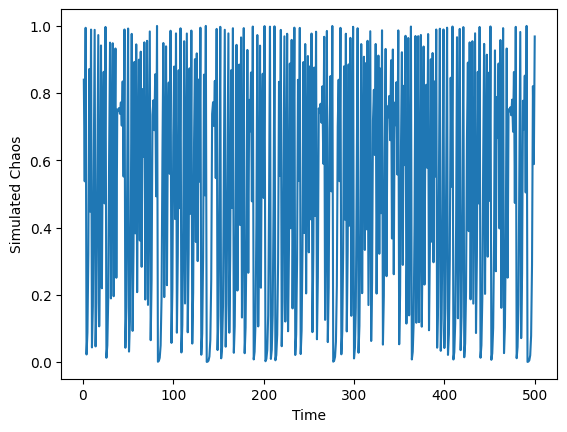

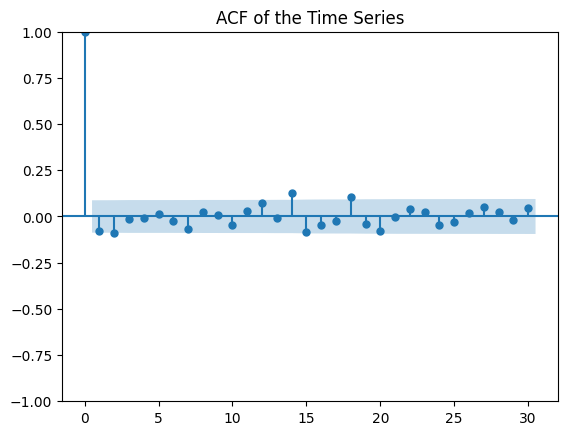

In [19]:
x.plot()
plt.xlabel('Time')
plt.ylabel('Simulated Chaos')
plt.show()

plot_acf(x, lags=30) # plotting ACF
plt.title("ACF of the Time Series")
plt.show()

## 4.3 White noise test

How to statistically test whether a stationary time series is a white noise?

For a stationary time series $\{X_t\}$ is a white noise if and only if its autocorrelation function $(ACF) \rho_k = 0$ for any integer $k = 0$.

### **Example 2 [continues]: Quarterly Exchange Rates of GBP to NZ Dollar**

The quarterly exchange rates of GBP to NZD are a financial time series. We often analyze their logarithms because this stabilizes the average and variability, reduces trends, and makes the data more normal. This is important due to the volatility in financial data. Logging also highlights relative changes instead of absolute values, which is key for understanding percentage returns and growth rates in finance.

In [20]:
# Logarithm of the series:
logxts = np.log(xts)

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


We need to difference the time series to achieve stationarity before testing for white noise. Differencing will be more closely investigated later.

In [21]:
dlogxts = logxts.diff(1).dropna()  # Remove NaN values resulting from differencing

Test for white noise:

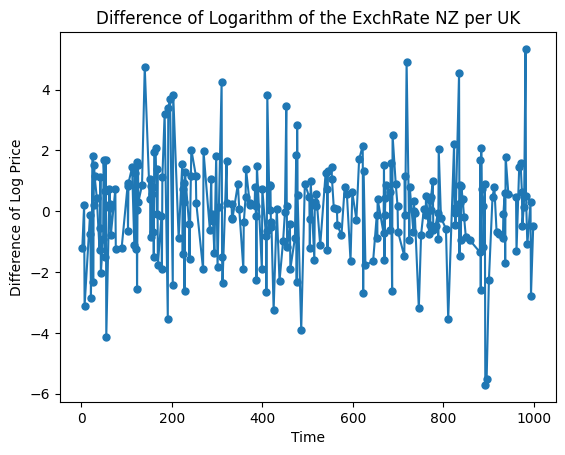

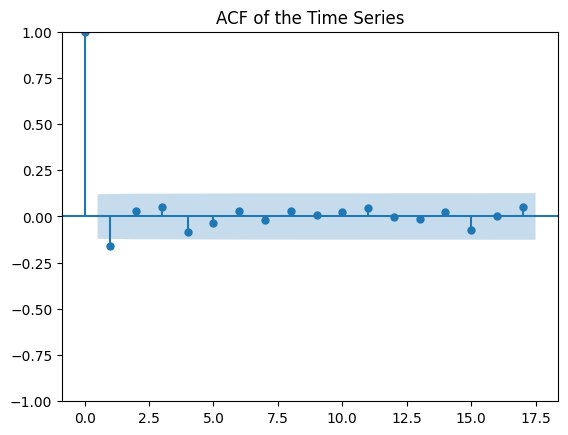

ACF values: [ 1.00000000e+00 -1.60790774e-01  3.06570410e-02  5.10775441e-02
 -8.37079061e-02 -3.62775840e-02  3.17537784e-02 -1.90084431e-02
  3.21144791e-02  6.17841643e-03  2.68864947e-02  4.65652985e-02
 -1.38636414e-03 -1.14407067e-02  2.43655168e-02 -7.40277374e-02
  6.16604353e-04  5.16840274e-02 -2.37491979e-02 -6.60859665e-02
 -2.30104525e-03 -1.19919867e-01  1.77944073e-02  1.66943547e-02
  4.24815192e-02  3.72741215e-02  2.52240981e-02 -3.87409964e-02
  5.10913506e-02 -5.01331535e-02  1.04547577e-01 -4.14496398e-02
 -3.14669679e-02  2.37130308e-03  1.71620940e-02  2.41972896e-02]
Ljung-Box statistics: [ 6.92907811  7.18192747  7.88648403  9.78602902 10.14417535 10.41962878
 10.51871894 10.80265841 10.81320888 11.01378782 11.61780348 11.618341
 11.65509141 11.82244486 13.37342444 13.37353247 14.13564333 14.29721235
 15.55335951 15.55488862 19.72501852 19.81721576 19.89870139 20.42853582
 20.83813655 21.02649735 21.47268932 22.25198731 23.005508   26.29642718
 26.81592388 27.1

In [22]:
# Plotting the differenced logarithmic series
dlogxts.plot(marker='o', markersize=5)
plt.title('Difference of Logarithm of the ExchRate NZ per UK')
plt.xlabel('Time')
plt.ylabel('Difference of Log Price')
plt.show()

# Plotting the ACF
plot_acf(dlogxts, lags=17)
plt.title("ACF of the Time Series")
plt.show()

# Calculating ACF, Ljung-Box statistics, and p-values
r, q, p = acf(dlogxts, nlags=35, qstat=True)
print('ACF values:', r) 
print('Ljung-Box statistics:', q)
print('P-values:', p)

The Ljung-Box statistic checks if there are significant autocorrelations at multiple lags. The null hypothesis is that the data are independently distributed (i.e., white noise). If the p-value is low (commonly less than 0.05), we reject the null hypothesis.

The differentiated time series, indicated by the p-values from the Ljung-Box test, suggests that it behaves like white noise at higher lags since the p-values for those lags are greater than 0.05, indicating no significant autocorrelation. However, since the earlier p-values (for the first few lags) indicate some level of autocorrelation, we can't definitively say that the entire differentiated time series is purely white noise. It is approaching white noise behavior but might still have some dependencies at the initial lags.

## 5. Time Series Features: Time Series Decomposition

 In practice, many of realistic time series possess either deterministic seasonality (component) or a deterministic trend (component). Some of them may have both. After extracting the trend and seasonal components from a time series, the remainder is its random (variation) component. Decomposing a time series is helpful to better understand it and improve forecast accuracy.

In [19]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose

### **Example 3: Australian Employed Total Persons**

The "Australia Employed Total Persons" dataset tracks the monthly total number of employed people in Australia from February 1978 to November 2018. Initially, the time series shows a steady upward trend with no apparent seasonality. However, when zooming in on data from January 2013 to January 2017, clear seasonal patterns emerge, repeating every year. Seasonal plots confirm that these patterns are consistent with little variation over time.

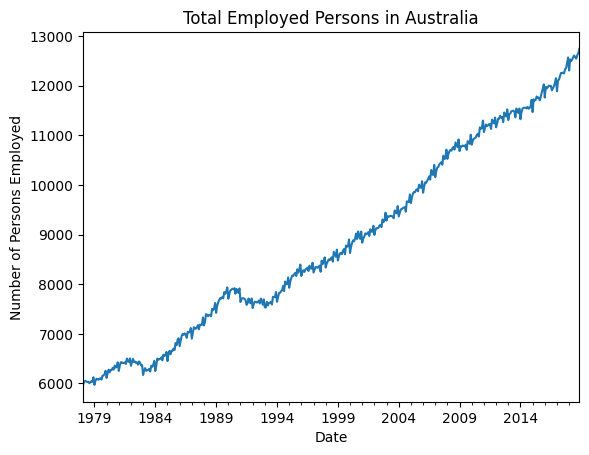

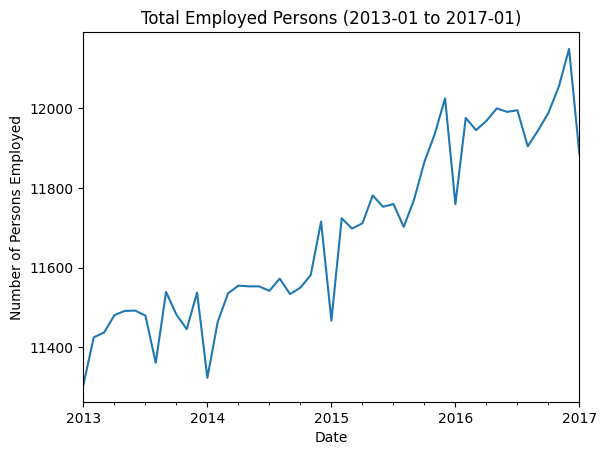

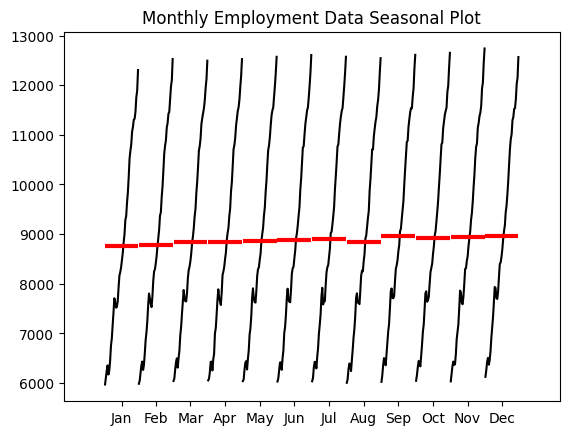

In [20]:
# Get the data file path
dtapath = getdtapath()

# Load the Excel file containing employment data
aul = pd.read_excel(dtapath + 'AustraliaEmployedTotalPersons.xlsx', header=0)

# Create a time index starting from February 1978 with monthly frequency
timeindex = pd.date_range('1978-02', periods=len(aul), freq='ME')
aul.index = timeindex

# Extract the 'EmployedP' column for analysis
aults = aul['EmployedP']

# Plot the time series
aults.plot()
plt.title('Total Employed Persons in Australia')
plt.ylabel('Number of Persons Employed')
plt.xlabel('Date')
plt.show()

# Graph time series plot from January 2013 to January 2017
aults['2013-01':'2017-01'].plot()
plt.title('Total Employed Persons (2013-01 to 2017-01)')
plt.ylabel('Number of Persons Employed')
plt.xlabel('Date')
plt.show()

# Plot seasonal plots
month_plot(aults)
plt.title('Monthly Employment Data Seasonal Plot')
plt.show()

Using an additive model to decompose the time series:

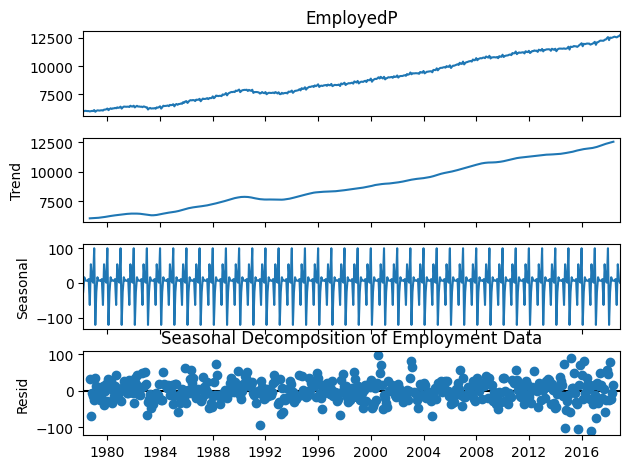

In [21]:
# Decompose the time series using an additive model (Time series=Trend+Seasonality+Residual)
aultsdeca = seasonal_decompose(aults, model='additive')
aultsdeca.plot()
plt.title('Seasonal Decomposition of Employment Data')
plt.show()

After decomposition, the residuals should ideally represent the random noise that remains after removing trend and seasonal patterns. By plotting the ACF of the residuals, we can determine if any patterns or correlations were not captured by the decomposition. A random noise pattern should show insignificant autocorrelation (i.e., ACF values near zero). 
In addition, rolling means help evaluate if the average of the residuals is constant, indicating stationarity. A trend in the rolling mean suggests a non-stationary component. Rolling standard deviations reveal the variability of the residuals; significant changes may indicate heteroscedasticity.

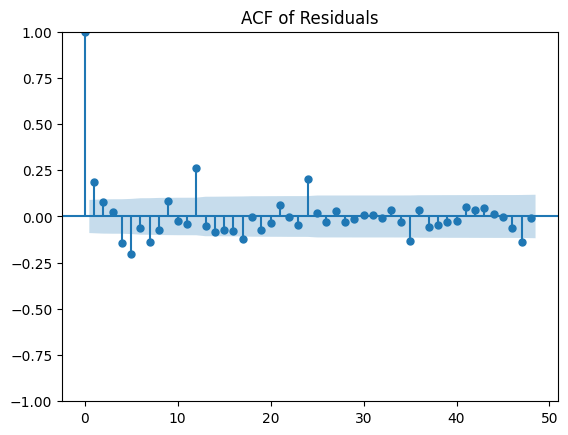

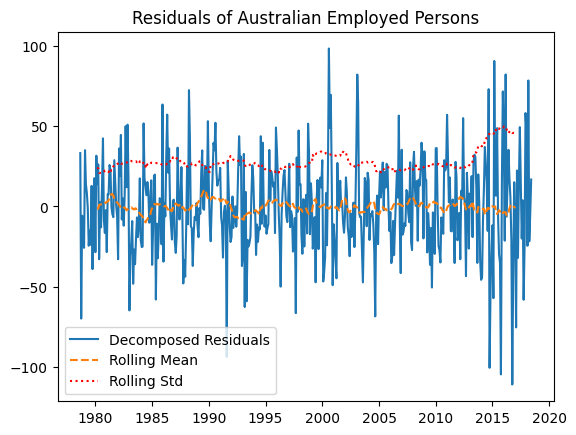

In [22]:
# Extract residuals from the decomposition and drop NaN values
aultsdecaResid = aultsdeca.resid.dropna()

# Plot ACF of the residuals
plot_acf(aultsdecaResid, lags=48)
plt.title('ACF of Residuals')
plt.show()

# Rolling mean and standard deviation
rolm = aultsdecaResid.rolling(window=36, center=True).mean()
rolstd = aultsdecaResid.rolling(window=36, center=True).std()

# Plotting residuals, rolling mean, and rolling std
plt.plot(aultsdecaResid, label='Decomposed Residuals')
plt.plot(rolm, label='Rolling Mean', linestyle='--')
plt.plot(rolstd, label='Rolling Std', linestyle=':', c='red')
plt.title('Residuals of Australian Employed Persons')
plt.legend()
plt.show()

The residuals are mostly stationary, though there are seasonal correlations at specific lags.

## 6. Multivariate Time Series

In multivariate time series analysis, we examine multiple interrelated variables simultaneously instead of just one. This analysis helps us understand how these variables influence each other over time and enables joint forecasting. The methods used for analyzing single time series can often be adapted for multivariate scenarios, but it becomes essential to consider how the interactions between these variables affect their individual behaviors. The following are some specific analyses for exploring the dynamic relationships and dependencies inherent in multivariate datasets and time series.

### **Example 4: Large Dataset of Synthetic Time Series**

We generate multiple synthetic independent time series with trend, seasonal effect and random noise.

/tmp/ipykernel_138/975767424.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2000-01-01', periods=100, freq='M')


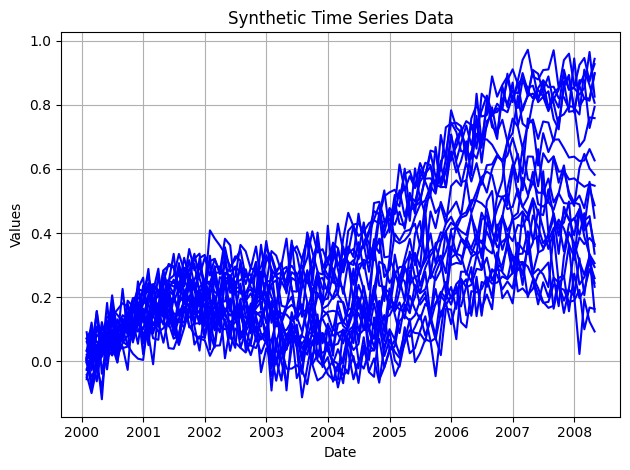

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
dates = pd.date_range('2000-01-01', periods=100, freq='M')

# Create a DataFrame to hold the time series
data = pd.DataFrame(index=dates)

# Generate time series
n_series = 24
for i in range(1, n_series + 1):  # 24 time series
    trend = np.linspace(0, np.random.uniform(0.1, 1), len(dates))  # Linear trend
    seasonal = 0.1 * np.sin(np.linspace(0, 3 * np.pi, len(dates)))  # Seasonal effect
    noise = np.random.normal(loc=0, scale=0.05, size=len(dates))  # Random noise
    series = trend + seasonal + noise  # Combine to create the time series
    data[f'Series_{i}'] = series

# Plotting all the time series; highlight the last two series
plt.figure()
for column in data.columns:
    plt.plot(data.index, data[column], label=column, color='blue')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()  # Adjust the layout
plt.show()

## 6.1 Pearson Correlation

Pearson correlation measures how strong and in what direction two continuous variables are related. It ranges from -1 to 1: a value of 1 means a perfect positive relationship, -1 means a perfect negative relationship, and 0 means no relationship. It looks at how much one variable changes in relation to another and is commonly used to understand connections between variables.

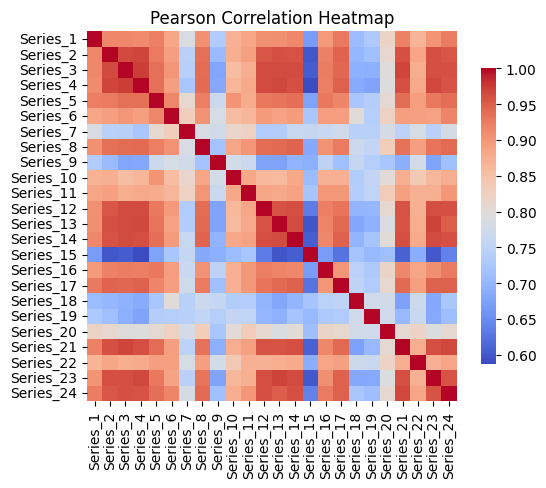

Most Correlated Series: Series_4 and Series_3


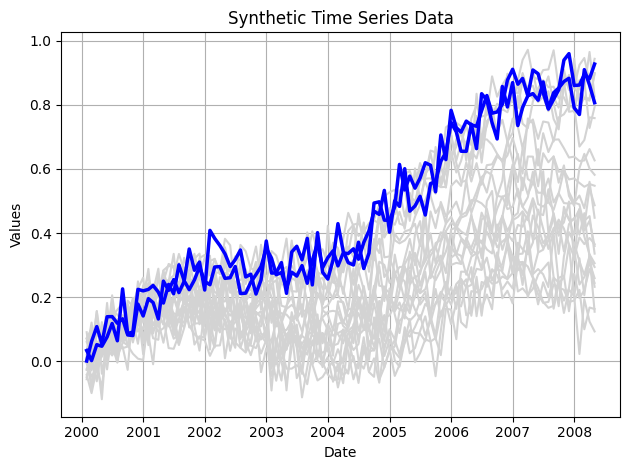

In [24]:
# calculate Pearson correaltion
correlation_matrix = data.corr()

# plot heatmap
import seaborn as sns # another library for plotting
plt.figure()
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Heatmap')
plt.show()

# Find the two most correlated series
corr_values = correlation_matrix.unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values < 1.0] # Exclude self-correlations (1.0) 
most_correlated_pair = corr_values.idxmax()
series1, series2 = most_correlated_pair
print(f'Most Correlated Series: {series1} and {series2}')

# Plotting all the time series, highlighting the two most correlated series
plt.figure()
for column in data.columns:
    plt.plot(data.index, data[column], label=column, color='lightgrey')
plt.plot(data.index, data[series1], label=series1, color='blue', linewidth=2.5)  # First highlighted series
plt.plot(data.index, data[series2], label=series2, color='blue', linewidth=2.5)  # Second highlighted series
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()

## 6.2 Cross-Correlation Analysis

The cross-correlation between the two selected time series measures how similar they are at different time lags. We limit the analysis to a maximum of 15 lags.

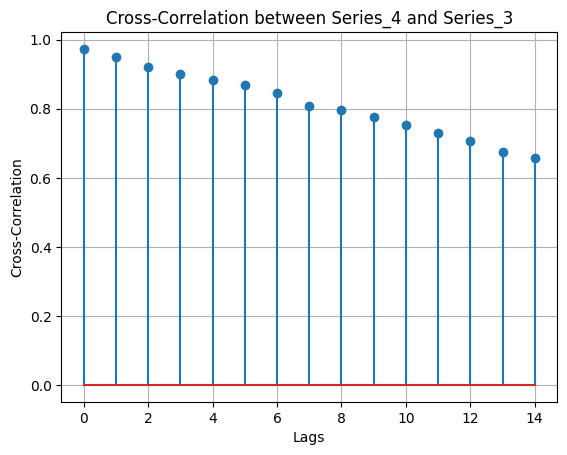

In [25]:
from statsmodels.tsa.stattools import ccf

max_lag = 15
cross_corr = ccf(data[series1], data[series2])[:max_lag]

# Plot Cross-Correlation
plt.figure()
plt.stem(range(max_lag), cross_corr)
plt.title(f"Cross-Correlation between {series1} and {series2}")
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.grid()
plt.show()

The plot reveals a strong correlation at lag 0, indicating that the two series change together simultaneously. As we increase the lag, the correlation slowly decreases but remains relatively high up to 14 time units, showing a positive relationship that weakens over time. In summary, the plot demonstrates that Series_4 and Series_3 are closely connected, and this relationship continues even when one series is shifted over time.

## 6.3 Dimensionality Reduction: Principal Component Analysis (PCA)

We create a PCA model and specify that we want to keep 5 principal components (PCs). We then transform the standardized data (discussed later in more detail) to extract these components, which capture the most important patterns in the data.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# calculate PCs
pca = PCA(n_components=5)  # Adjust number of components if necessary
pca_scores = pca.fit_transform(standardized_data)
pca_df = pd.DataFrame(data=pca_scores, columns=[f'PC_{i + 1}' for i in range(pca.n_components_)], index=data.index)

In [10]:
data

,Series_1,Series_2,Series_3,Series_4,Series_5,Series_6,Series_7,Series_8,Series_9,Series_10,...,Series_15,Series_16,Series_17,Series_18,Series_19,Series_20,Series_21,Series_22,Series_23,Series_24
2000-01-31,-0.055594,0.012878,0.001197,0.034098,0.005743,0.002426,0.008530,0.010551,0.020629,0.032274,...,0.072781,-0.004134,-0.048672,-0.026766,-0.041615,-0.023266,0.011829,-0.005163,0.070553,0.060597
2000-02-29,0.029866,0.013184,0.061994,0.002516,0.092809,-0.028440,0.053945,0.009645,-0.085374,0.121040,...,0.100861,0.008374,0.015143,0.006996,-0.098901,0.007048,0.086479,-0.068890,-0.001627,0.029259
2000-03-31,0.041707,-0.062211,0.108578,0.052180,0.038904,0.039652,-0.020295,0.001629,-0.010396,0.010280,...,0.058998,0.104509,0.082659,0.039557,-0.021380,0.156823,-0.021881,0.017660,0.019157,0.013843
2000-04-30,0.091944,0.049051,0.055216,0.047236,0.103056,0.036467,-0.080080,0.063055,0.085163,0.049247,...,0.062019,0.074581,0.071167,0.043748,0.018982,-0.038455,0.056900,0.122538,-0.117984,0.055415
2000-05-31,0.025782,0.069782,0.139281,0.076109,0.111456,0.039626,0.056837,0.055184,0.086971,0.063123,...,0.000045,0.005780,0.126269,0.080705,0.121440,0.061214,0.034177,0.053266,0.094171,-0.024882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-31,0.442135,0.792969,0.859985,0.790652,0.570558,0.447126,0.202305,0.494322,0.189741,0.325155,...,0.203458,0.495343,0.484519,0.273500,0.348710,0.368934,0.775925,0.316523,0.854693,0.638263
2008-01-31,0.474661,0.669803,0.861465,0.769709,0.556324,0.394625,0.321446,0.516869,0.223069,0.386792,...,0.023077,0.489333,0.602324,0.197619,0.239653,0.311316,0.876502,0.470366,0.924272,0.624678
2008-02-29,0.438878,0.689949,0.894586,0.909574,0.544422,0.462147,0.206390,0.477552,0.100068,0.365679,...,0.193945,0.421472,0.646972,0.221880,0.262835,0.269844,0.876079,0.389239,0.945826,0.626339
2008-03-31,0.452924,0.760573,0.881585,0.861410,0.552947,0.323800,0.332617,0.559832,0.167954,0.384717,...,0.124280,0.539323,0.601077,0.287749,0.308528,0.328202,0.727624,0.333427,0.872583,0.661843


In [9]:
standardized_data.shape

(100, 24)

The explained variance in the PCA describes how much variance (or information) each PC captures. Higher values mean the component is more important. It helps us understand how many components we might need to keep for analysis.

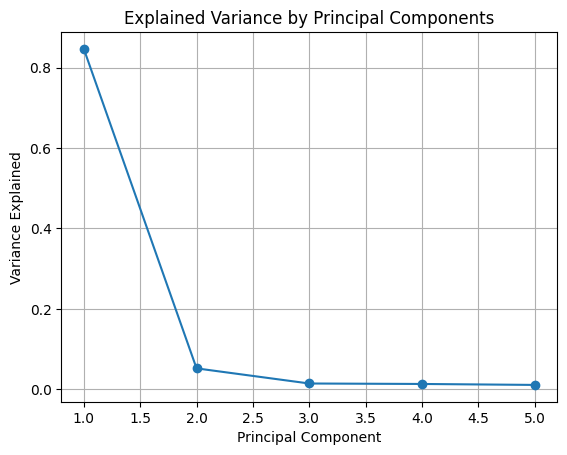

In [27]:
# Plotting the explained variance
plt.figure()
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

We visualize the values of the first two PCs over time. This helps us see how the main patterns in the data change, making it easier to explore trends and relationships in the dataset.

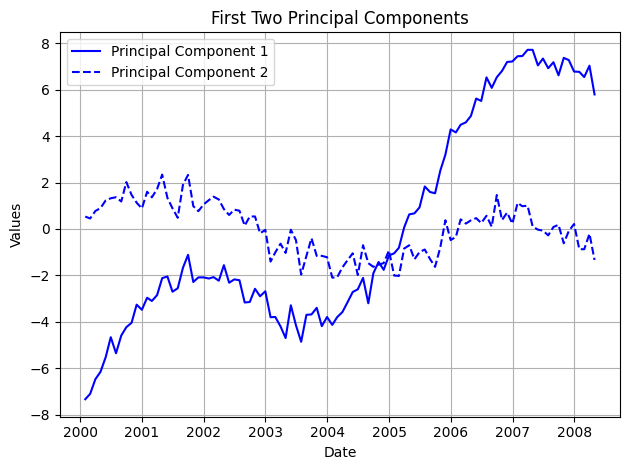

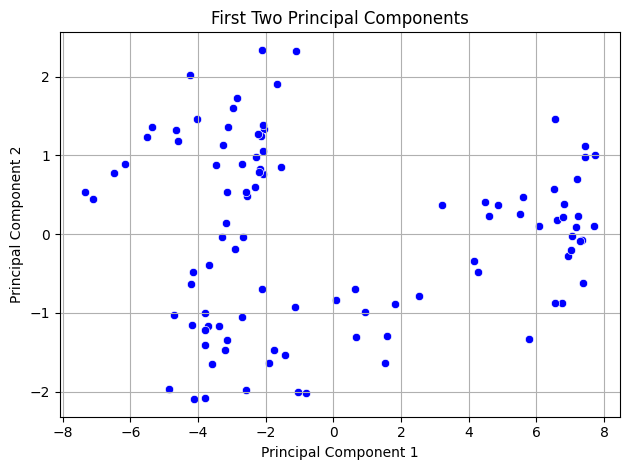

In [28]:
# Plotting the first two principal components

# time series plot
plt.figure()
plt.plot(pca_df.index, pca_df['PC_1'], label='Principal Component 1', color='blue')
plt.plot(pca_df.index, pca_df['PC_2'], label='Principal Component 2', color='blue', linestyle='--')
plt.title('First Two Principal Components')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust the layout
plt.show()

# scatterplot
plt.figure()
sns.scatterplot(data=pca_df, x='PC_1', y='PC_2', color='blue')
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.tight_layout()
plt.show()